<center>

**Aspectos Aritméticos de la Teoría de Ehrhart**

</center>

<p align="center">
    <img src="https://logowik.com/content/uploads/images/escudo-de-la-universidad-nacional-de-colombia-20163327.logowik.com.webp" width="400">
</p>


<center>

# **Función Zeta de Riemann**

---

<div align="justify">

La función zeta de Riemann, denotada como $\zeta(s)$, es una función analítica compleja definida inicialmente para $\Re(s) > 1$ mediante la serie infinita

$$
\zeta(s) = \sum_{n=1}^\infty \frac{1}{n^s}
$$

donde $s = \sigma + it$ es un número complejo, con $\sigma, t \in \mathbb{R}$ y $n^s = e^{s \log n}$ empleando la rama principal del logaritmo complejo.

**Extensión Analítica y Polo Simple**

La función $\zeta(s)$ posee una extensión analítica meromorfa a todo el plano complejo $\mathbb{C}$, exceptuando un único polo simple en $s=1$ con residuo 1. Esta extensión se consigue a través de técnicas avanzadas de análisis complejo, permitiendo estudiar la función más allá del dominio inicial de convergencia.

**Ecuación Funcional**

$\zeta(s)$ satisface la fórmula funcional que establece una relación simétrica entre los valores de la función en $s$ y $1 - s$:

$$
\zeta(s) = 2^s \pi^{s-1} \sin\left(\frac{\pi s}{2}\right) \Gamma(1 - s) \zeta(1 - s)
$$

donde $\Gamma(s)$ es la función gamma, la extensión analítica del factorial para números complejos. Esta identidad es fundamental para el estudio de la función en el plano complejo y revela la simetría crucial respecto a la línea crítica $\Re(s) = \frac{1}{2}$.

**Ceros de la Función Zeta**

La función $\zeta(s)$ tiene ceros ubicados en dos categorías principales:

- Ceros triviales: ubicados en los enteros negativos pares:

$$s = -2, -4, -6 , ...$$

- Ceros no triviales: ubicados en la llamada banda crítica, el conjunto:

$$
\{ s \in \mathbb{C} : 0 < \Re(s) < 1 \}
$$

**Hipótesis de Riemann**

La hipótesis central en el estudio de la función zeta es que todos los ceros no triviales se encuentran exactamente en la línea crítica:

$$ℜ(s) = \frac{1}{2}$$

es decir,

$$
\text{Si } \zeta(s) = 0 \text{ y } 0 < \Re(s) < 1, \text{ entonces } \Re(s) = \frac{1}{2}
$$

Esta conjetura tiene profundas implicaciones para la distribución de los números primos y la estructura fundamental de la aritmética.

**Representación Integral**

Para $\Re(s) > 1$, $\zeta(s)$ puede representarse mediante la integral de Mellin:

$$
\zeta(s) = \frac{1}{\Gamma(s)} \int_0^\infty \frac{x^{s-1}}{e^x - 1} \, dx
$$


que permite su extensión a otros valores complejos y es clave en técnicas analíticas avanzadas.

**Visualización en el Plano Complejo**

Visualizar $\zeta(s)$ implica mapear cada punto

Visualizar $\zeta(s)$ implica mapear cada punto

$$
s = \sigma + it
$$

en el dominio complejo a un valor

$$
\zeta(s)
$$

en el codominio complejo, descomponiendo $\zeta(s)$ en sus partes real e imaginaria. Particularmente, la trayectoria de

$$
\zeta\left(\frac{1}{2} + it\right), \quad t \in \mathbb{R}
$$

revela patrones fractales y simetrías que reflejan la complejidad intrínseca de la función y su vínculo con la distribución de los números primos.
</div>

---

**📥Importaciones📦**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
from mpmath import *
import time

**👨‍💻Implementación👩‍💻**

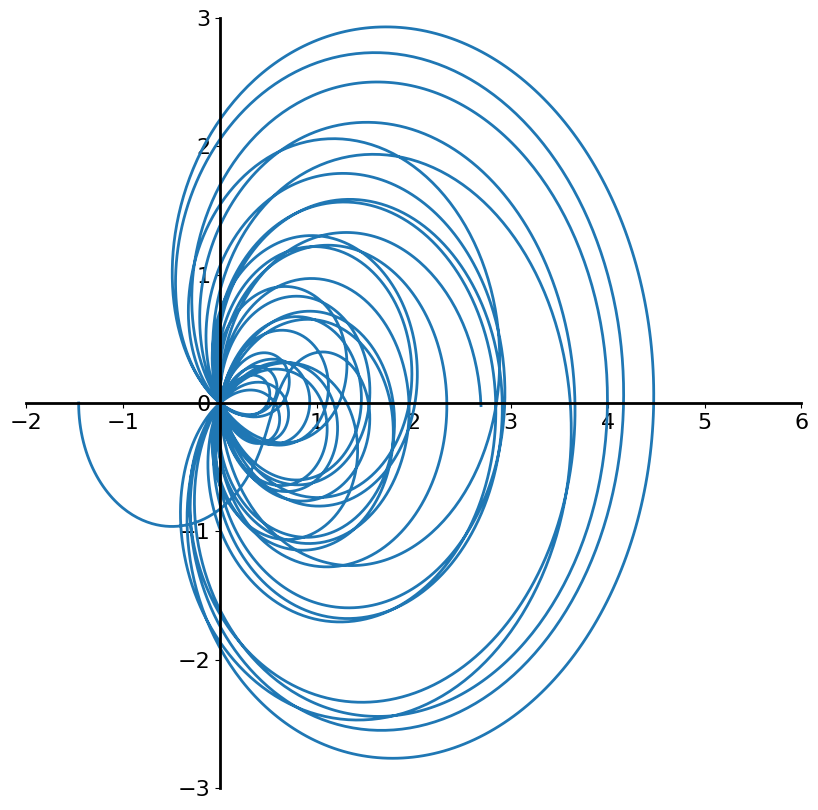

In [ ]:

warnings.filterwarnings("ignore")
mp.dps = 10

N = 10000
T = 100
dt = T / N
t = linspace(0.0, T, N + 1)

z_values = [zeta(0.5 + 1j * tt) for tt in t]
re_z = np.array([float(val.real) for val in z_values])
im_z = np.array([float(val.imag) for val in z_values])

fig = plt.figure(figsize=(10, 10), frameon=False)
ax = plt.axes(xlim=(-2, 6), ylim=(-3, 3))

ax.spines['left'].set_position('zero')
ax.spines['left'].set_linewidth(2.0)
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_linewidth(2.0)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(labelsize=16)

plt.plot(re_z, im_z, lw=2)

plt.show()


**👨‍💻Implementación👩‍💻**

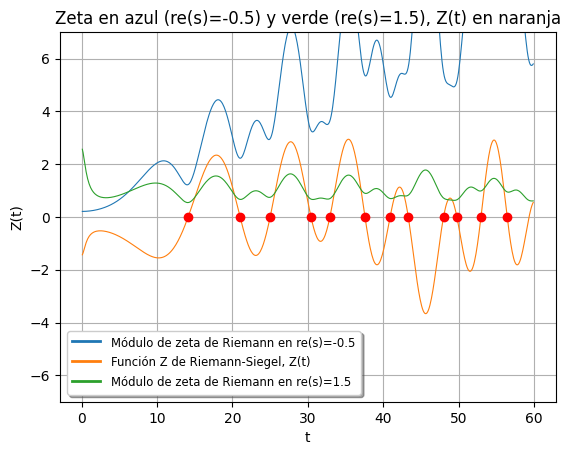

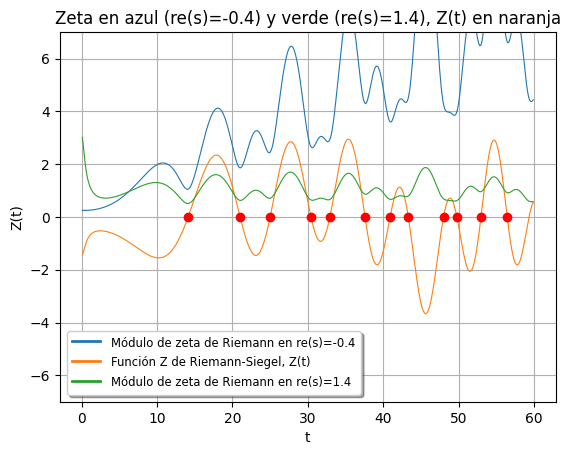

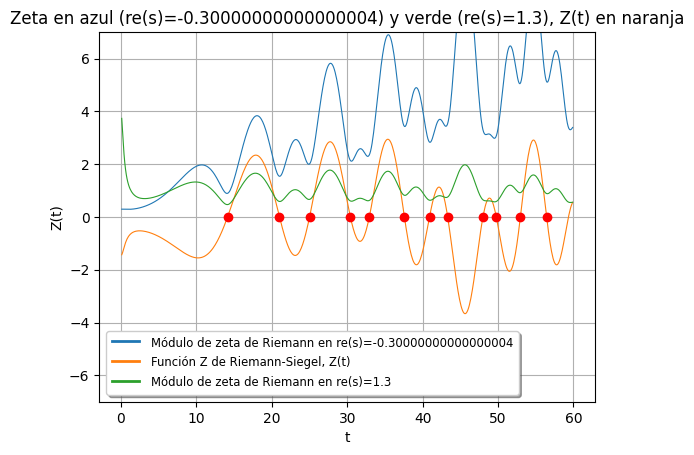

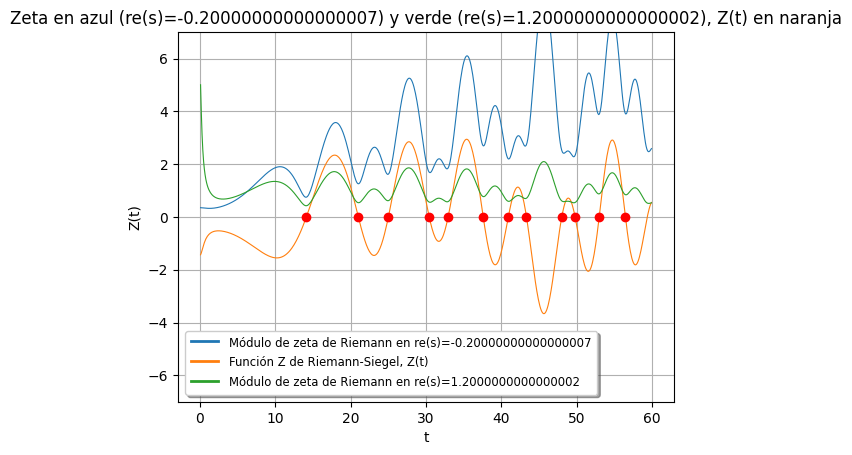

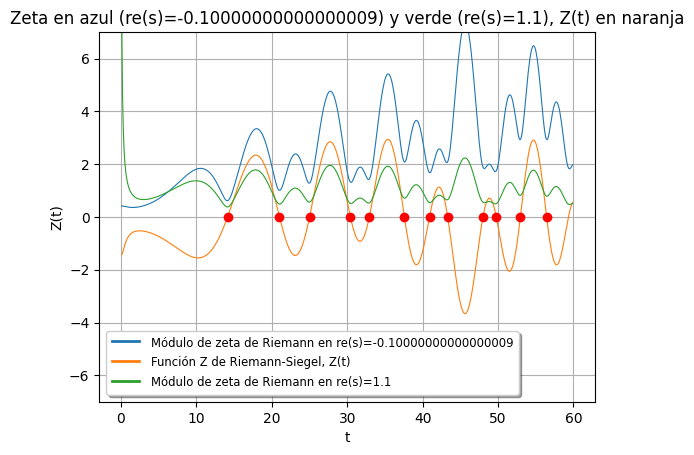

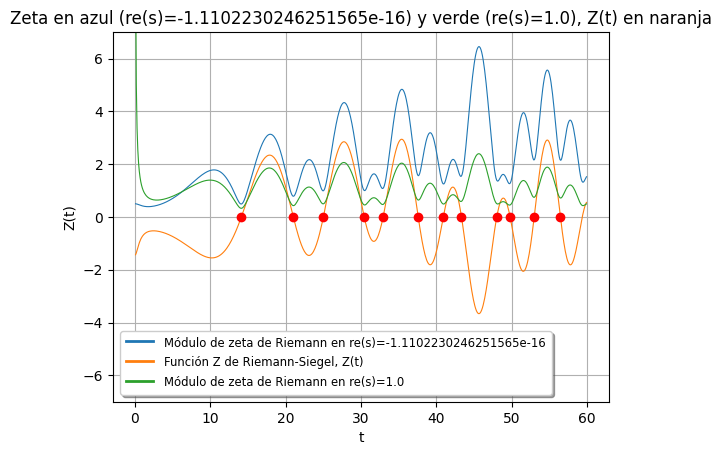

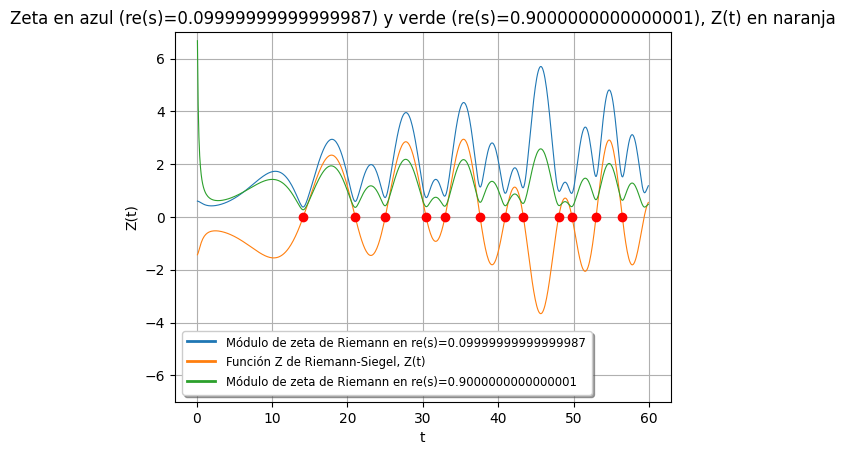

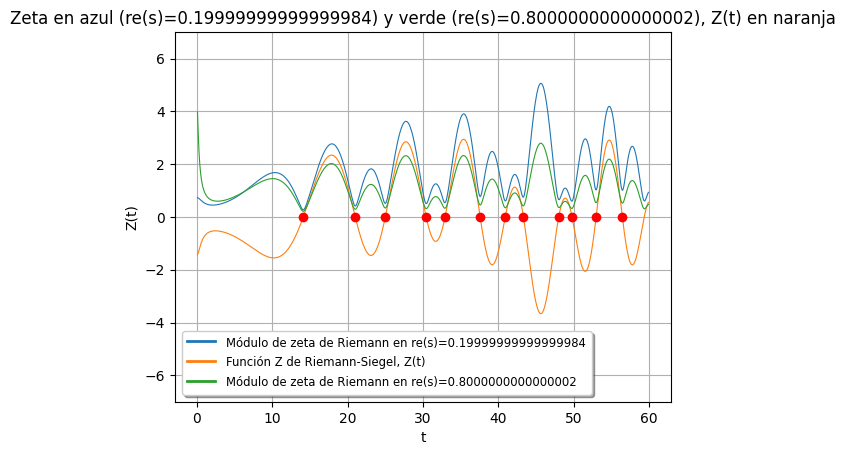

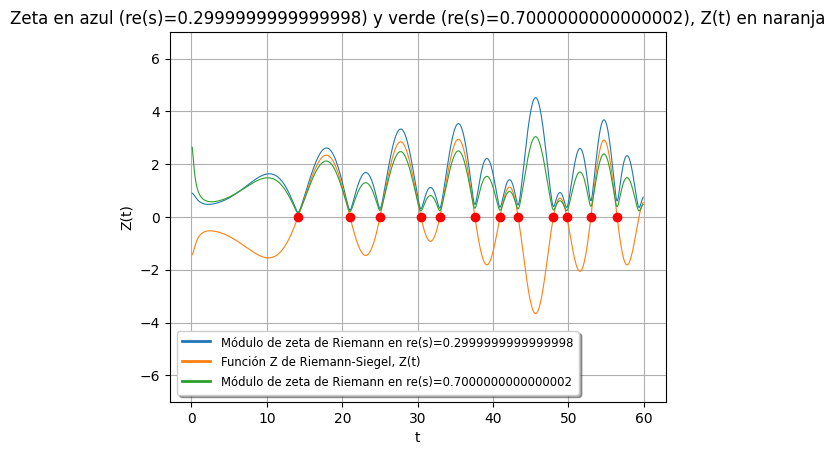

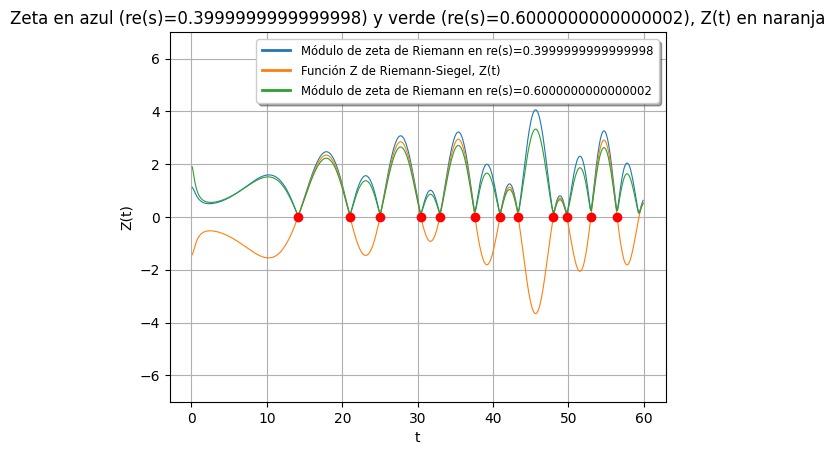

In [ ]:

mp.dps = 25
mp.pretty = True

def graficar_zeta(real):
    A, B, C, D = [], [], [], []

    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i in np.arange(0.1, 60.0, 0.1):
        funcion = zeta(real + 1j * i)
        funcion2 = zeta((real + ((0.5 - real) * 2)) + 1j * i)
        funcion1 = siegelz(i)
        A.append(abs(funcion))
        B.append(funcion1)
        C.append(i)
        D.append(abs(funcion2))

    ax.grid(True)
    ax.plot(C, A, label=f'Módulo de zeta de Riemann en re(s)={real}', lw=0.8)
    ax.plot(C, B, label='Función Z de Riemann-Siegel, Z(t)', lw=0.8)
    ax.plot(C, D, label=f'Módulo de zeta de Riemann en re(s)={real + (0.5 - real)*2}', lw=0.8)
    ax.set_title(f'Zeta en azul (re(s)={real}) y verde (re(s)={real + (0.5 - real)*2}), Z(t) en naranja')
    ax.set_ylabel('Z(t)')
    ax.set_xlabel('t')

    leyenda = ax.legend(shadow=True)
    for texto in leyenda.get_texts():
        texto.set_fontsize('small')
    for linea in leyenda.get_lines():
        linea.set_linewidth(2.0)

    for i in range(1, 13):
        cero = zetazero(i)
        ax.plot(cero.imag, [0.0], "ro")

    ax.set_ylim(-7, 7)

    plt.show()
    time.sleep(1)
    print("")

for i in np.arange(-0.5, 0.5, 0.1):
    graficar_zeta(i)


# **Rieman and Cross Polytopes**

---

<div align="justify">

**Cross Polytopes y su Ehrhart Polynomial**

El *cross polytope* de dimensión $d$, denotado como $\Diamond_d$, es un poliedro en $\mathbb{R}^d$ definido como la envolvente convexa de los vectores estándar y sus negativos:

$$
\Diamond_d := \mathrm{conv}\{\pm e_1, \pm e_2, \ldots, \pm e_d\}
$$

Alternativamente, $\Diamond_d$ puede definirse por la desigualdad lineal:

$$
\sum_{i=1}^d |x_i| \leq 1.
$$

El polinomio de Ehrhart $$i(\Diamond_d, t)$$ cuenta los puntos enteros dentro del poliedro dilatado $t \Diamond_d$, es decir:

$$
i(\Diamond_d, t) = \# \left\{ x \in \mathbb{Z}^d : |x_1| + |x_2| + \cdots + |x_d| \leq t \right\}.
$$

Se puede expresar explícitamente como:

$$
i(\Diamond_d, t) = \sum_{k=0}^d 2^k \binom{d}{k} \binom{t}{k}.
$$

Este polinomio tiene propiedades notables relacionadas con la raíz unitaria del polinomio $$h^*(z)$$, que resulta ser:

$$
h^*(\Diamond_d, z) = (1+z)^d,
$$

es decir, sus raíces están en el círculo unitario en el plano complejo. Por ello, los cross polytopes son ejemplos de poliedros $h^*-unit-circle-rooted$.


**Relación entre los Cross Polytopes y la Hipótesis de Riemann Local**

Los cross polytopes, definidos como

$
\Diamond_d = \mathrm{conv}\{\pm e_1, \pm e_2, \ldots, \pm e_d\},
$

poseen un polinomio de Ehrhart

$$
i(\Diamond_d, t) = \sum_{k=0}^d 2^k \binom{d}{k} \binom{t}{k},
$$

que cuenta los puntos enteros dentro de la dilatación $t \Diamond_d$.

Un resultado clave es que el polinomio de Ehrhart de $\Diamond_d$ es $h^*-unit-circle-rooted$, es decir, su polinomio $h^*(z) = (1 + z)^d$ tiene todas sus raíces en el círculo unitario del plano complejo.

Según el teorema (Liu, 2018):

> Si el polinomio $$h^*(z)$$ de un poliedro integral tiene todas sus raíces en el círculo unitario, entonces existen raíces del polinomio de Ehrhart $$i(P, t)$$ cuya parte real es constante y negativa, concretamente

$$\operatorname{Re}(r) = -\frac{1 + (d - k)}{2},$$

donde $d$ es la dimensión del poliedro y $k$ es el grado de $h^*(z)$.

En el caso del cross polytope, como $h^*(z) = (1+z)^d$ tiene grado $k = d$, todas las raíces de $i(\Diamond_d, t)$ tienen parte real igual a

$$
\operatorname{Re}(r) = -\frac{1}{2}.
$$

Este hecho es significativo porque es análogo a la ubicación de los ceros no triviales de la función zeta de Riemann, que según la Hipótesis de Riemann deben ubicarse en la línea crítica

$$
\operatorname{Re}(s) = \frac{1}{2}.
$$

La similitud entre estas ubicaciones —las raíces del polinomio de Ehrhart de los cross polytopes con parte real $-1/2$ y los ceros de la función zeta con parte real $1/2$ refleja una conexión profunda entre la geometría combinatoria de estos poliedros y la estructura analítica de funciones relacionadas con la Hipótesis de Riemann local.

Esta correspondencia sugiere que la estructura algebraica y geométrica de los cross polytopes puede ser vista como un modelo que refleja la simetría crítica central en la ubicación de ceros que caracteriza a la Hipótesis de Riemann, abriendo vías para entender fenómenos analíticos complejos mediante objetos geométricos discretos.


</center>

---

**📥Instalación módulos📦**

In [1]:

!sudo apt update
!sudo apt install libcairo2-dev \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython==8.21.0
!pip install mpmath numpy

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,245 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,901 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://developer.download.nvidia.com/compute/c

**📥Importaciones📦**

In [1]:

from manim import *
import mpmath
import numpy as np

**👨‍💻Implementación👩‍💻**

Manim Community v0.19.0

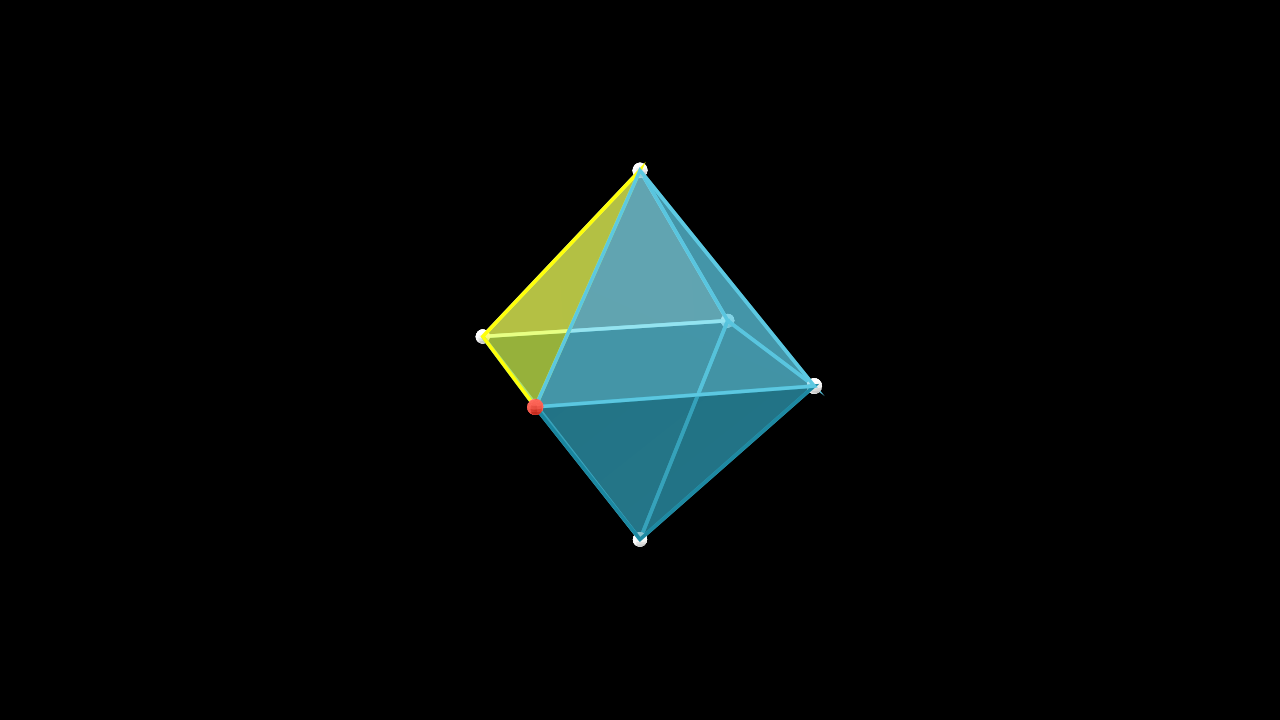

In [9]:

%%manim -qm -v WARNING PolyhedronSubMobjects

class PolyhedronSubMobjects(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        octahedron = Octahedron(edge_length = 3)
        octahedron.graph[0].set_color(RED)
        octahedron.faces[2].set_color(YELLOW)
        self.add(octahedron)

# **Circunferencia Unitaria**

**👨‍💻Implementación👩‍💻**

In [2]:

%%manim -qm -v WARNING ComplexPlaneExample

class ComplexPlaneExample(Scene):
    def construct(self):
        plane = ComplexPlane().add_coordinates()
        self.add(plane)
        circle = Circle(radius=1, color=YELLOW)
        self.add(circle)
        theta = np.pi / 4
        z = np.cos(theta) + 1j * np.sin(theta)
        dot = Dot(plane.n2p(z), color=RED)
        self.add(dot)
        label = MathTex(r"e^{i \pi/4}").next_to(dot, UR)
        self.add(label)

        self.wait(3)

Manim Community v0.19.0

**👨‍💻Implementación👩‍💻**

In [3]:

%%manim -qm -v WARNING PuntosMoviendoseEnCircunferencia

class PuntosMoviendoseEnCircunferencia(Scene):
    def construct(self):
        plane = ComplexPlane().add_coordinates()
        self.add(plane)
        circle = Circle(radius=1, color=YELLOW)
        self.add(circle)

        n_points = 5
        radius = 1
        dots = VGroup()

        angles = np.linspace(0, 2 * np.pi, n_points, endpoint=False)

        for angle in angles:
            z = radius * (np.cos(angle) + 1j * np.sin(angle))
            dot = Dot(plane.n2p(z), color=RED)
            dots.add(dot)

        self.add(dots)

        def update_dots(mob, dt):
            for i, dot in enumerate(mob):
                new_angle = (angles[i] + self.time) % (2 * np.pi)
                new_pos = radius * (np.cos(new_angle) + 1j * np.sin(new_angle))
                dot.move_to(plane.n2p(new_pos))

        dots.add_updater(update_dots)

        self.wait(6)

Manim Community v0.19.0

# **Región Crítica**

**👨‍💻Implementación👩‍💻**

In [4]:

%%manim -qm -v WARNING  CriticalStripWithZeros


class CriticalStripWithZeros(Scene):
    def construct(self):
        plane = ComplexPlane(
            x_range=[-0.2, 1.2, 0.1],
            y_range=[-7, 7, 1],
            x_length=10,
            y_length=7,
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 1,
                "stroke_opacity": 0.2,
            },
        ).add_coordinates()
        self.add(plane)

        left_edge = plane.n2p(0 + 0j)
        right_edge = plane.n2p(1 + 0j)
        width = right_edge[0] - left_edge[0]

        critical_strip = Rectangle(
            width=width,
            height=plane.y_length,
            fill_color=BLUE_D,
            fill_opacity=0.15,
            stroke_width=0,
        )
        critical_strip.move_to(plane.n2p(0.5 + 0j))
        self.add(critical_strip)

        critical_line = DashedLine(
            start=plane.n2p(0.5 - 7j),
            end=plane.n2p(0.5 + 7j),
            color=MAROON_C,
            stroke_width=3,
            dash_length=0.15,
        )
        self.add(critical_line)


        zeros_im = np.array([
            14.1347, 21.0220, 25.0109, 30.4248, 32.9351, 37.5862,
            40.9187, 43.3271, 48.0052, 49.7738
        ])


        zeros = VGroup()
        for im in zeros_im:
            z = complex(0.5, im)
            dot = Dot(plane.n2p(z), radius=0.07, color=RED)
            zeros.add(dot)
        self.add(zeros)


        for dot in zeros:
            self.play(FadeIn(dot), run_time=0.3)


        title = Text("Hipótesis de Riemann: Banda crítica y ceros no triviales", font_size=28)
        title.to_edge(UP)
        self.add(title)

Manim Community v0.19.0

**👨‍💻Implementación👩‍💻**

In [5]:

%%manim -qm -v WARNING  CriticalLineZerosComplexPlane

class CriticalLineZerosComplexPlane(Scene):
    def construct(self):
        plane = ComplexPlane(
            x_range=[0, 1, 0.1],
            y_range=[-50, 50, 10],
            x_length=8,
            y_length=8,
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 1,
                "stroke_opacity": 0.3,
            },
        ).add_coordinates()
        self.add(plane)

        critical_line = DashedLine(
            start=plane.n2p(0.5 + 50j),
            end=plane.n2p(0.5 - 50j),
            color=MAROON_C,
            stroke_width=2
        )
        self.add(critical_line)

        zeros_im = np.linspace(-40, 40, 20)

        zeros = VGroup()
        for im in zeros_im:
            z = complex(0.5, im)
            dot = Dot(plane.n2p(z), radius=0.05, color=RED)
            zeros.add(dot)
        self.add(zeros)

        moving_dot = Dot(plane.n2p(complex(0.5, zeros_im[0])), radius=0.15, color=BLUE)
        self.add(moving_dot)

        title = MathTex(r"Re(s) = \frac{1}{2}")

        title.next_to(critical_line, LEFT, buff=0.5).shift(UP * 2)
        self.add(title)

        for im in zeros_im:
            self.play(moving_dot.animate.move_to(plane.n2p(complex(0.5, im))), run_time=0.3)

Manim Community v0.19.0

**👨‍💻Implementación👩‍💻**

In [6]:

%%manim -qm -v WARNING CriticalStripWithZerosMinusHalf

class CriticalStripWithZerosMinusHalf(Scene):
    def construct(self):
        plane = ComplexPlane(
            x_range=[-1.2, 0.2, 0.1],
            y_range=[-7, 7, 1],
            x_length=10,
            y_length=7,
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 1,
                "stroke_opacity": 0.2,
            },
        ).add_coordinates()
        self.add(plane)
        left_edge = plane.n2p(-1 + 0j)
        right_edge = plane.n2p(0 + 0j)
        width = right_edge[0] - left_edge[0]

        critical_strip = Rectangle(
            width=width,
            height=plane.y_length,
            fill_color=BLUE_D,
            fill_opacity=0.15,
            stroke_width=0,
        )
        critical_strip.move_to(plane.n2p(-0.5 + 0j))
        self.add(critical_strip)
        critical_line = DashedLine(
            start=plane.n2p(-0.5 - 7j),
            end=plane.n2p(-0.5 + 7j),
            color=MAROON_C,
            stroke_width=3,
            dash_length=0.15,
        )
        self.add(critical_line)
        zeros_im = np.array([
            14.1347, 21.0220, 25.0109, 30.4248, 32.9351, 37.5862,
            40.9187, 43.3271, 48.0052, 49.7738
        ])

        zeros = VGroup()
        for im in zeros_im:
            z = complex(-0.5, im)
            dot = Dot(plane.n2p(z), radius=0.07, color=RED)
            zeros.add(dot)
        self.add(zeros)

        for dot in zeros:
            self.play(FadeIn(dot), run_time=0.3)
        title = Text("Hipótesis de Riemann: Banda crítica y ceros no triviales en Re(s) = -1/2", font_size=28)
        title.to_edge(UP)
        self.add(title)

Manim Community v0.19.0

**👨‍💻Implementación👩‍💻**

In [7]:

%%manim -qm -v WARNING  CriticalLineMinusHalf

class CriticalLineMinusHalf(Scene):
    def construct(self):
        plane = ComplexPlane(
            x_range=[-1, 0, 0.1],
            y_range=[-50, 50, 10],
            x_length=8,
            y_length=8,
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 1,
                "stroke_opacity": 0.3,
            },
        ).add_coordinates()
        self.add(plane)

        critical_line = DashedLine(
            start=plane.n2p(-0.5 + 50j),
            end=plane.n2p(-0.5 - 50j),
            color=MAROON_C,
            stroke_width=2
        )
        self.add(critical_line)

        zeros_im = np.linspace(-40, 40, 20)

        zeros = VGroup()
        for im in zeros_im:
            z = complex(-0.5, im)
            dot = Dot(plane.n2p(z), radius=0.05, color=RED)
            zeros.add(dot)
        self.add(zeros)

        moving_dot = Dot(plane.n2p(complex(-0.5, zeros_im[0])), radius=0.15, color=BLUE)
        self.add(moving_dot)

        title = MathTex(r"Re(s) = -\frac{1}{2}")

        title.next_to(critical_line, LEFT, buff=0.5).shift(UP * 2)

        self.add(title)

        for im in zeros_im:
            self.play(moving_dot.animate.move_to(plane.n2p(complex(-0.5, im))), run_time=0.3)

Manim Community v0.19.0

**👨‍💻Implementación👩‍💻**

Manim Community v0.19.0

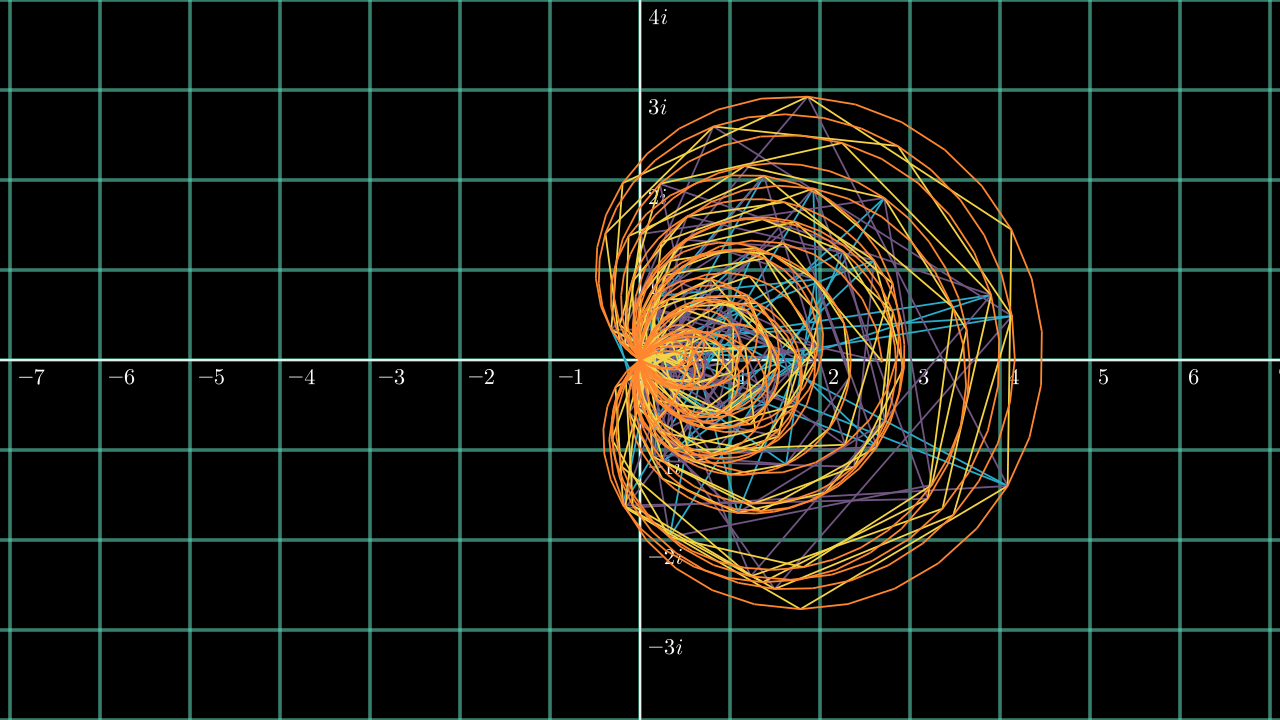

In [8]:

%%manim -qm -v WARNING --fps 60 RiemannZeta

class RiemannZeta(Scene):
    def construct(self):
        plane = ComplexPlane(
                    x_range=[-10, 10, 1],
                    y_range=[-10, 10, 1],
                    background_line_style={
                        "stroke_color": TEAL,
                        "stroke_width": 4,
                        "stroke_opacity": 0.6
                        }
                    )
        self.add(plane.add_coordinates())

        rz_group = Group()

        for i in np.arange(1, 100, 2):
            z = mpmath.zeta(complex(.5, i))
            a = float(z.real)
            b = float(z.imag)
            c = i
            zz = mpmath.zeta(complex(.5, (i+2)))
            d = float(zz.real)
            e = float(zz.imag)
            f = i + 2
            rz_trace_1 = Line(start=[a,b,c],end=[d,e,f],color=BLUE_D,stroke_width=2)

            rz_group.add(rz_trace_1)

        for i in np.arange(1, 100, 1):
            z = mpmath.zeta(complex(.5, i))
            a = float(z.real)
            b = float(z.imag)
            c = i
            zz = mpmath.zeta(complex(.5, (i+1)))
            d = float(zz.real)
            e = float(zz.imag)
            f = i + 1
            rz_trace_2 = Line(start=[a,b,c],end=[d,e,f],color=PURPLE_D,stroke_width=2)

            rz_group.add(rz_trace_2)

        for i in np.arange(1, 100, .5):
            z = mpmath.zeta(complex(.5, i))
            a = float(z.real)
            b = float(z.imag)
            c = i
            zz = mpmath.zeta(complex(.5, (i+.5)))
            d = float(zz.real)
            e = float(zz.imag)
            f = i + .5
            rz_trace_3 = Line(start=[a,b,c],end=[d,e,f],color=YELLOW_D,stroke_width=2)

            rz_group.add(rz_trace_3)

        for i in np.arange(1, 100, .1):
            z = mpmath.zeta(complex(.5, i))
            a = float(z.real)
            b = float(z.imag)
            c = i
            zz = mpmath.zeta(complex(.5, (i+.1)))
            d = float(zz.real)
            e = float(zz.imag)
            f = i + .1
            rz_trace_4 = Line(start=[a,b,c],end=[d,e,f],color=ORANGE,stroke_width=2)

            rz_group.add(rz_trace_4)

        self.add(rz_group)

**👨‍💻Implementación👩‍💻**

Manim Community v0.19.0

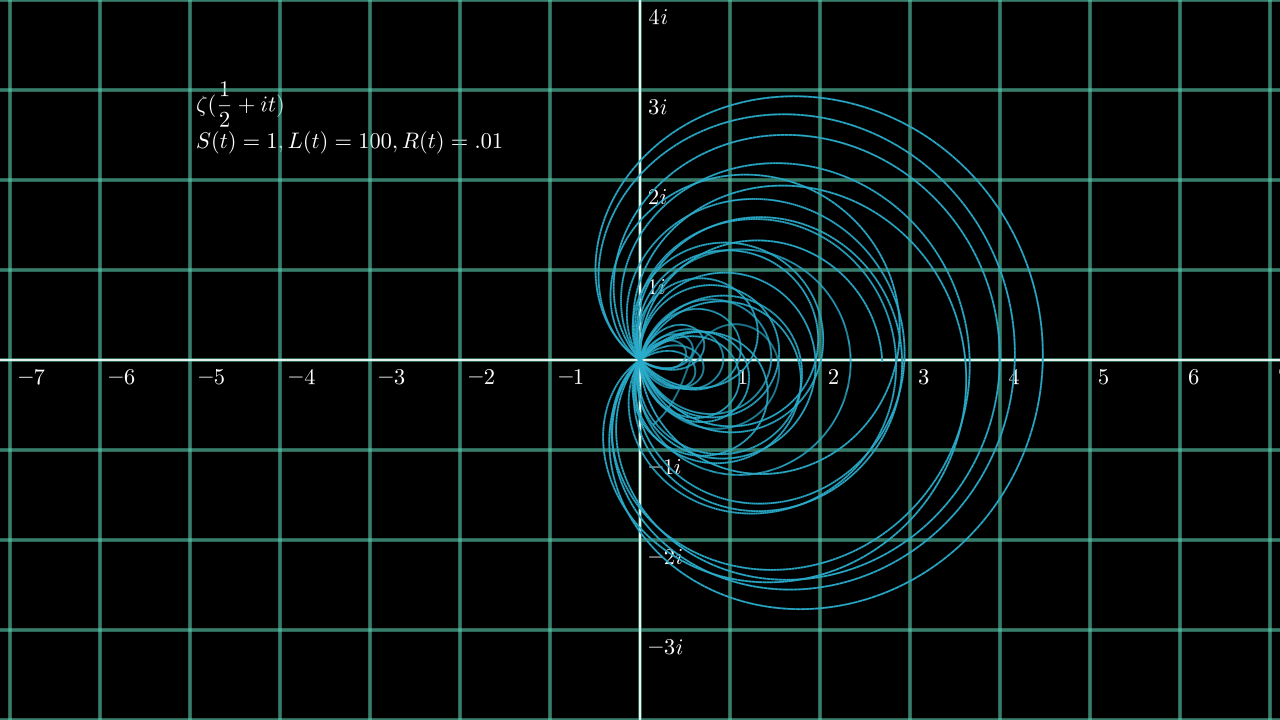

In [ ]:

%%manim -qm -v WARNING --fps 60 RiemannZeta

class RiemannZeta(Scene):
    def construct(self):
        start = 1
        top = 100
        rate = .01
        za = (1/2)
        zb = (1)
        text = '\\zeta(\\frac{1}{2} + it)'
        time_text = 'S(t) = 1, L(t) = 100, R(t) = .01'
        eq_values = MathTex(text)
        time_text = MathTex(time_text)
        text_group = VGroup(eq_values,time_text).arrange(DOWN, buff=.1, aligned_edge=LEFT)
        self.add(text_group)
        text_group.to_corner(UL).scale(.5)

        framerate = 60
        plane = ComplexPlane(
                    x_range=[-10, 10, 1],
                    y_range=[-10, 10, 1],
                    background_line_style={
                        "stroke_color": TEAL,
                        "stroke_width": 4,
                        "stroke_opacity": 0.6
                        }
                    )
        self.add(plane.add_coordinates())
        sw = 2
        dot_radius = 0.03
        for i in np.arange(start, top, rate):

            z = mpmath.zeta(complex(za, zb*i))
            a = float(z.real)
            b = float(z.imag)
            c = i
            zz = mpmath.zeta(complex(za, zb*(i+rate)))
            d = float(zz.real)
            e = float(zz.imag)
            f = i + rate
            rz_trace = Line(start=[a,b,c],end=[d,e,f],color=BLUE_D,stroke_width=2)

            self.add(rz_trace)

# **Referencias Bibliográficas**

# Referencias Bibliográficas

- Edwards, H. M. (2001). *Riemann's Zeta Function*. Dover Publications.
- Bombieri, E. (2000). *The Riemann Hypothesis – Official Problem Description*. Clay Mathematics Institute. https://www.claymath.org/millennium-problems/riemann-hypothesis
- Titchmarsh, E. C. (1986). *The Theory of the Riemann Zeta-Function*. Oxford University Press.
- Beck, M., & Robins, S. (2015). *Computing the Continuous Discretely* (2nd ed.). Springer. Undergraduate Texts in Mathematics. https://link.springer.com/book/10.1007/978-1-4939-2969-6

